In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def vec_diff(traj, i, j) -> list[int]:
    return np.subtract(
        [float(traj[i][1]), float(traj[i][2]), float(traj[i][3])],
        [float(traj[j][1]), float(traj[j][2]), float(traj[j][3])]
        )

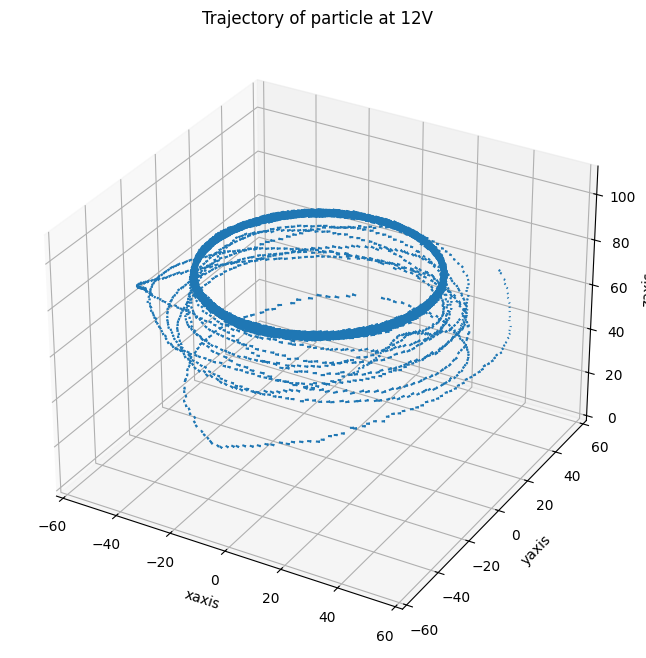

In [21]:
def plot_velocity(filename : str, title : str, begin : int, end : int):
    trajectory = []

    with open("data/" + filename + ".a") as file:
        for l, line, in enumerate(file):
            if l >= 10 + (begin * 1000) and l <= (end * 1000):
                trajectory.append([float(x) for x in line.split()[:4]])
    
    # find velocities
    velocities = []
    for i in range(5, len(trajectory) - 5):
        T1 = 0.10*((vec_diff(trajectory, i + 5, i))/(trajectory[i + 5][0] - trajectory[i][0]))
        T2 = 0.15*((vec_diff(trajectory, i + 4, i-1))/(trajectory[i + 4][0] - trajectory[i-1][0]))
        T3 = 0.25*((vec_diff(trajectory, i + 3, i-2))/(trajectory[i + 3][0] - trajectory[i-2][0]))
        T4 = 0.25*((vec_diff(trajectory, i + 2, i-3))/(trajectory[i + 2][0] - trajectory[i-3][0]))
        T5 = 0.15*((vec_diff(trajectory, i + 1, i-4))/(trajectory[i + 1][0] - trajectory[i-4][0]))
        T6 = 0.10*((vec_diff(trajectory, i + 0, i-5))/(trajectory[i + 0][0] - trajectory[i-5][0]))
        velocities.append(T1 + T2 + T3 + T4 + T5 + T6)
    
    fig=plt.figure(figsize=(8, 8))
    ax=fig.add_subplot(projection='3d')

    ax.quiver(
        [float(i[1]) for i in trajectory[5:len(trajectory) - 5]],
        [float(i[3]) for i in trajectory[5:len(trajectory) - 5]],
        [-float(i[2]) for i in trajectory[5:len(trajectory) - 5]],
        [float(i[0]) for i in velocities],
        [float(i[2]) for i in velocities],
        [float(i[1]) for i in velocities],
        length = 5.0
    )
    plt.xlabel("xaxis")
    plt.ylabel("yaxis")
    plt.title(title)
    ax.set_zlabel("zaxis")
    ax.set_zbound(lower=0, upper=110)
    ax.set_xbound(lower=-60, upper=60)
    ax.set_ybound(lower=-60, upper=60)

plot_velocity("m0_12V", "Trajectory of particle at 12V",0,  30)


In [ ]:
def plot_height(filename : str, title : str, begin : int, end : int):
    trajectory = []

    with open("data/" + filename + ".a") as file:
        for l, line, in enumerate(file):
            if l >= 10:
                trajectory.append(line.split()[:4])
    
    fig=plt.figure(figsize=(8, 8))
    ax=fig.add_subplot()

    ax.plot([((float(x[0])*0.001)) for x in trajectory[begin * 1000 :end * 1000]],
            [-float(x[2]) for x in trajectory][begin * 1000:end * 1000])
    plt.xlabel("Time [s]")
    plt.ylabel("Height of particle [mm]")
    plt.title("turbulent section")

In [ ]:

def plot_trajectory(filename : str, title : str, begin : int, end : int):
    
    trajectory = []

    with open("data/" + filename + ".a") as file:
        for l, line, in enumerate(file):
            if l >= 10:
                trajectory.append(line.split()[:4])
    
    fig=plt.figure(figsize=(8, 8))
    ax=fig.add_subplot(projection='3d')
    
    ax.scatter(
        [ float(x[1]) for x in trajectory][begin * 1000:end * 1000],
        [ float(x[3]) for x in trajectory][begin * 1000:end * 1000],
        [-float(x[2]) for x in trajectory][begin * 1000:end * 1000],
        c=[((float(x[0])*0.001)/(end - begin)) for x in trajectory[begin * 1000 :end * 1000]],
        marker='.')
    
    plt.xlabel("xaxis")
    plt.ylabel("yaxis")
    plt.title(title)
    ax.set_zlabel("zaxis")
    ax.set_zbound(lower=0, upper=110)
    ax.set_xbound(lower=-60, upper=60)
    ax.set_ybound(lower=-60, upper=60)
    plt.show()


In [ ]:
plot_trajectory("m0_12V", "Trajectory of particle at 12V",30,  35)

In [ ]:
plot_height("m0_12V", "Trajectory of particle at 12V",0, 1200)